# 独立同一分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 独立性

### 独立性の定義

### 独立性と無相関性

In [3]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [4]:
Cov(XY)

-0.000

In [5]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [6]:
Cov(XY)

0.000

In [7]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.111, 0.333)

## 和の分布

### 正規分布の和の分布

In [8]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.003, 4.996)

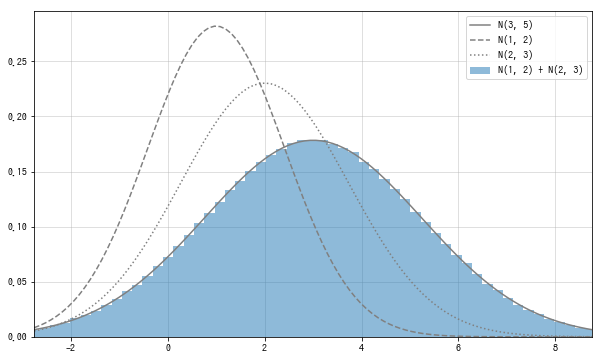

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

### ポアソン分布の和の分布

In [10]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999, 6.990)

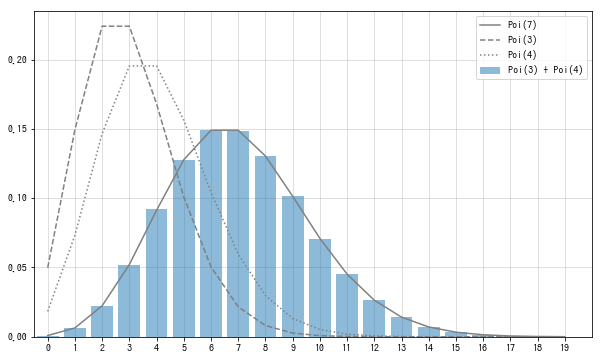

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

### ベルヌーイ分布の和の分布

In [12]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999, 2.095)

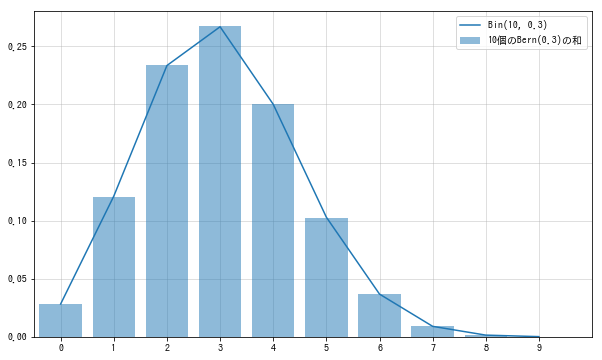

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='10個のBern(0.3)の和')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

## 標本平均の分布

### 正規分布の標本平均の分布

In [14]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.199)

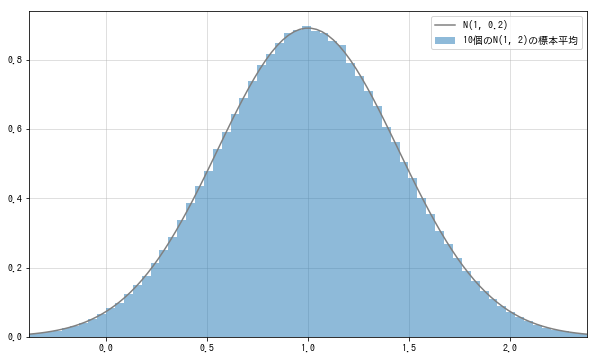

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='10個のN(1, 2)の標本平均')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### ポアソン分布の標本平均の分布

In [16]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.999, 0.300)

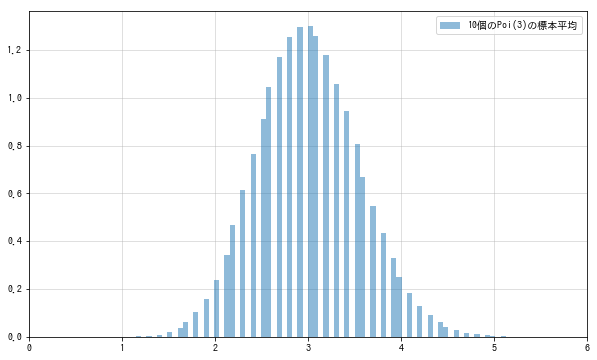

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='10個のPoi(3)の標本平均')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

### 中心極限定理

In [18]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

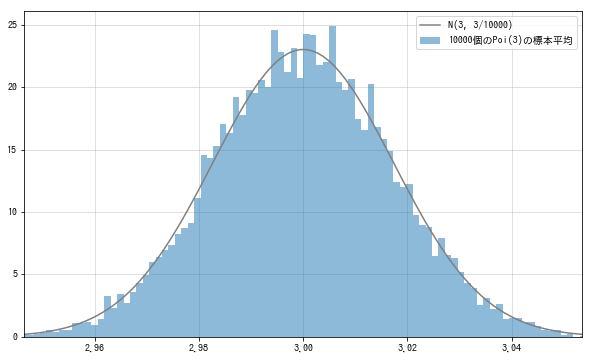

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='10000個のPoi(3)の標本平均')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 大数の法則

In [20]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

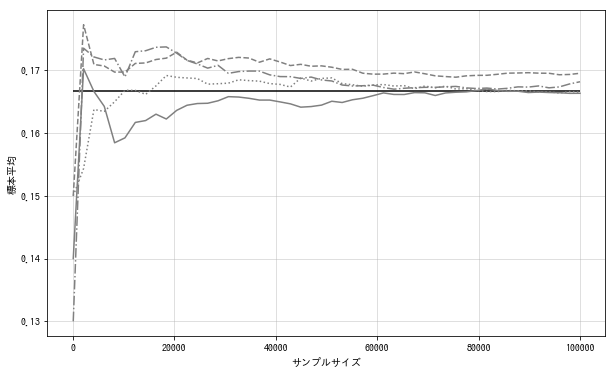

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('サンプルサイズ')
ax.set_ylabel('標本平均')

plt.show()